In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dataset = pd.read_csv("car performance-dataset.csv")
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
dataset.sample(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
350,34.7,4,105.0,63,2215,14.9,81,1,plymouth horizon 4
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
323,27.9,4,156.0,105,2800,14.4,80,1,dodge colt
117,29.0,4,68.0,49,1867,19.5,73,2,fiat 128
49,23.0,4,122.0,86,2220,14.0,71,1,mercury capri 2000
196,24.5,4,98.0,60,2164,22.1,76,1,chevrolet woody


Here the target column is mpg (miles per galon)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


Dataset Variable Description

1. mpg          - continuous
2. cylinders    - discrete
3. displacement - continuous
4. horsepower   - continuous
5. weight       - continuous
6. acceleration - continuous
7. model year   - discrete
8. origin       - discrete
9. car name     - categorical 

In [5]:
dataset.shape

(398, 9)

In [6]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
dataset["car name"].nunique()

305

# Checking for null values

In [8]:
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

The car name column has the car name starting with the company name, so if we extract the company name out of it we can get more knowledge from the data.

In [9]:
dataset["car name"].value_counts()

ford pinto               6
amc matador              5
ford maverick            5
toyota corolla           5
amc gremlin              4
                        ..
fiat 124b                1
datsun b210 gx           1
mercury marquis          1
dodge st. regis          1
toyota corona mark ii    1
Name: car name, Length: 305, dtype: int64

In [10]:
dataset["car name"] = [name.split()[0]  for name in dataset["car name"]]
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


# Exploratory Data Analysis (EDA)

<AxesSubplot:>

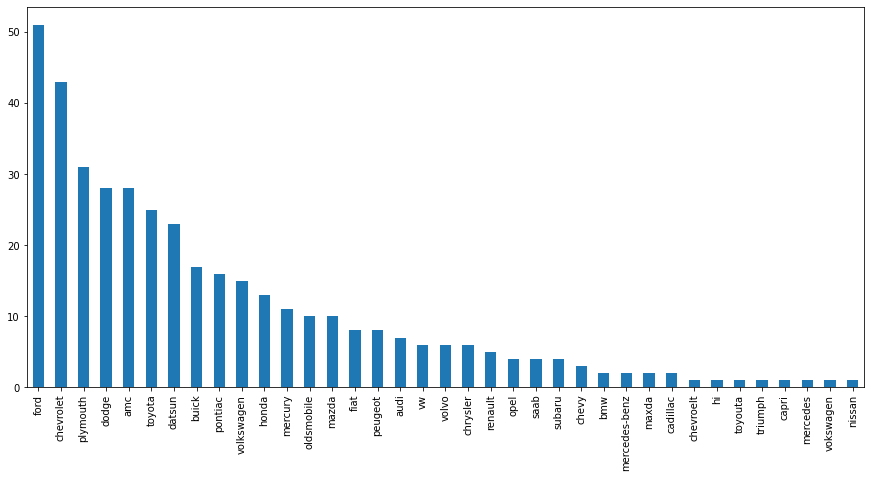

In [11]:
plt.figure(figsize = (15,7))
pd.value_counts(dataset["car name"]).plot.bar()

Most of the cars in the dataset belong to ford company

<AxesSubplot:xlabel='car name', ylabel='mpg'>

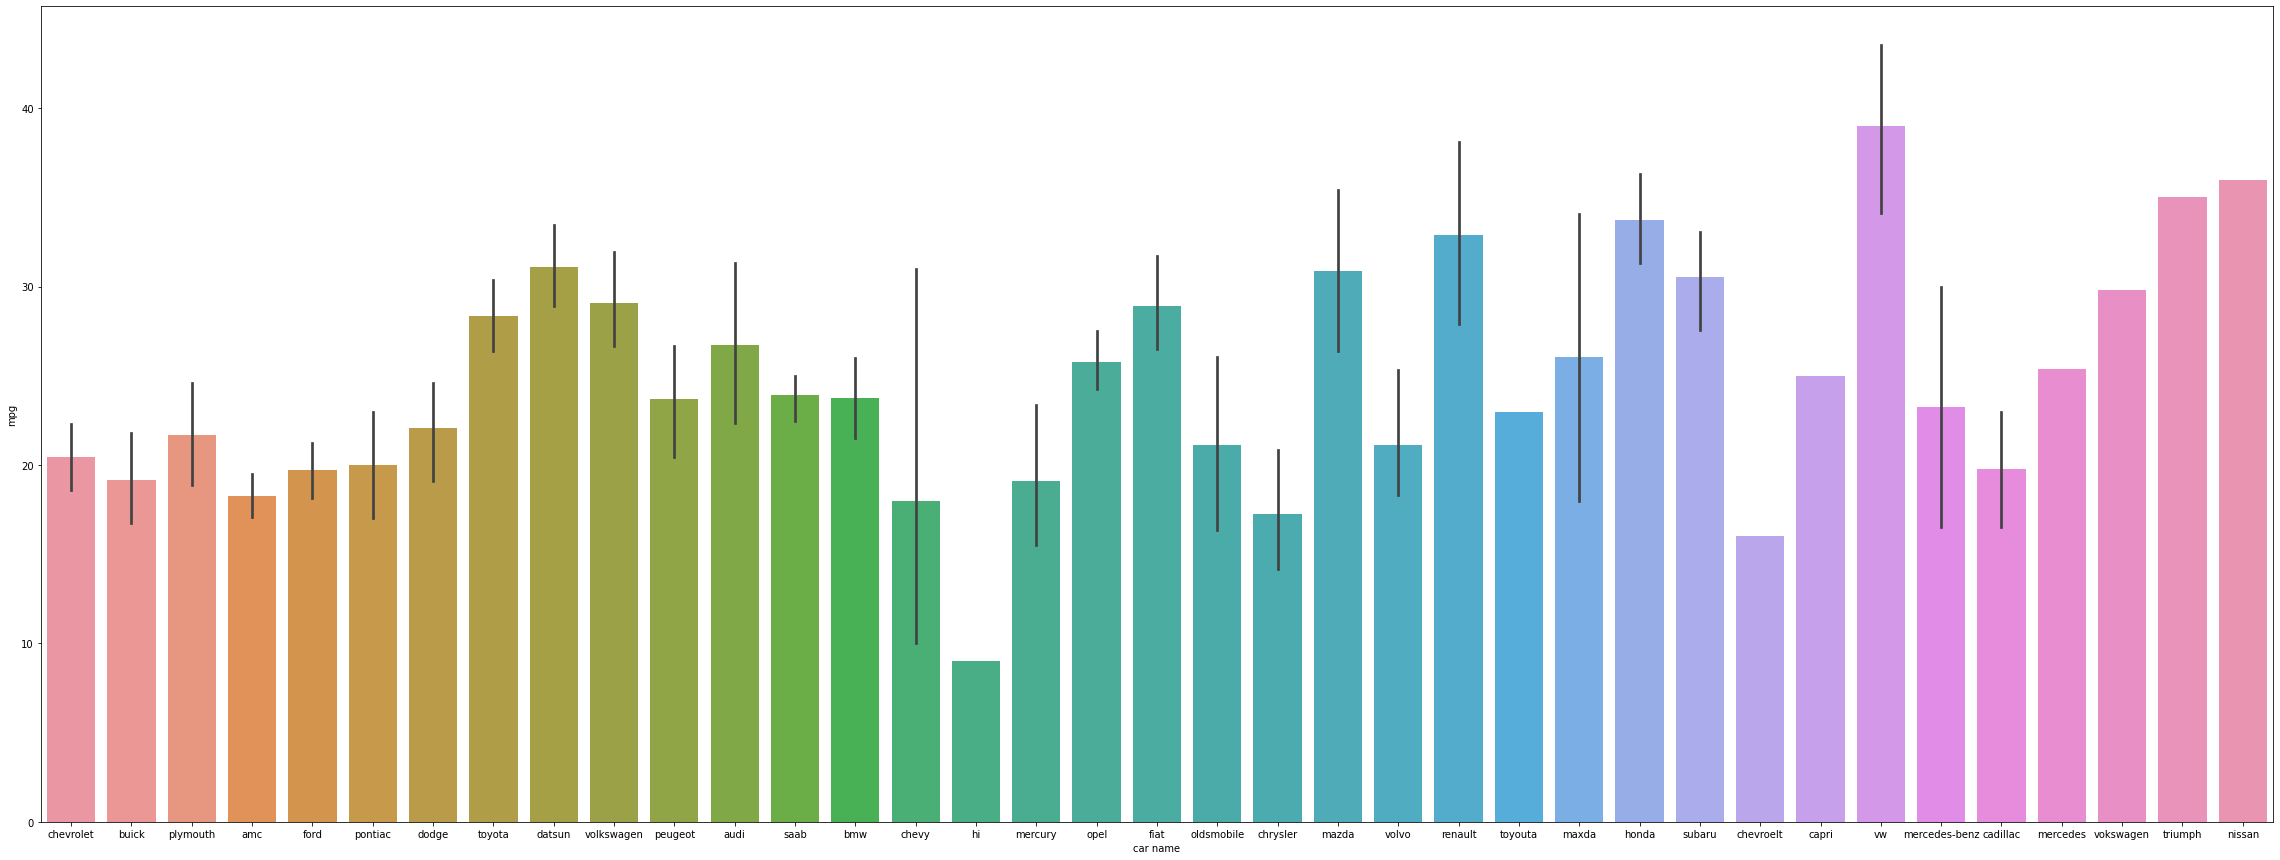

In [12]:
plt.figure(figsize = (40,15))
sns.barplot(x="car name",y="mpg",data=dataset)

And cars which belong to vw company have the best mpg values

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

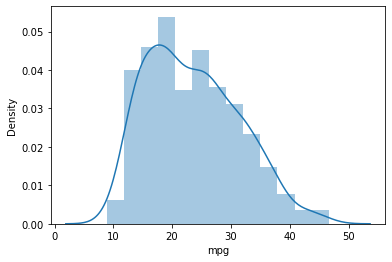

In [13]:
sns.distplot(dataset["mpg"]) 

As the histogram of mpg variable is left skewed, it means that the number of cars having low mpg is more than high mpg in the dataset

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

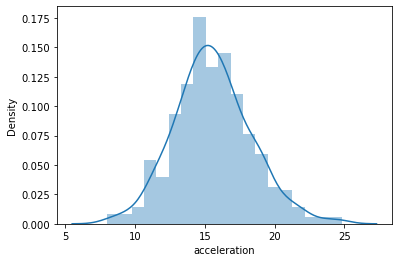

In [14]:
sns.distplot(dataset["acceleration"]) 

The distribution of acceleration follows normal distribution

<AxesSubplot:xlabel='model year', ylabel='mpg'>

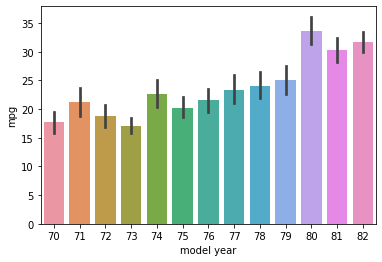

In [15]:
sns.barplot(x="model year",y="mpg",data=dataset)

In the above bar plot we can see that as the year went by the average mpg of the cars in the dataset improved, this shows that cars as become more efficient as time went by.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

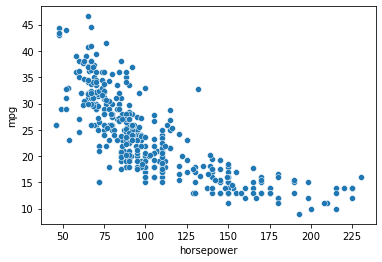

In [16]:
sns.scatterplot(x="horsepower",y="mpg",data=dataset)

The scatter plot above shows that cars with higher horsepower (sports cars) have low value of mpg 

<AxesSubplot:xlabel='weight', ylabel='mpg'>

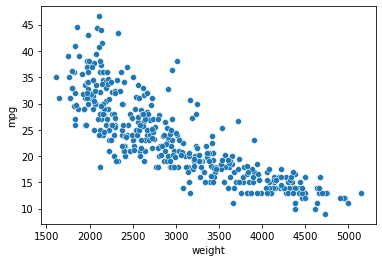

In [17]:
sns.scatterplot(x="weight",y="mpg",data=dataset)

Also as the weight of the car increases the miles per gallon (mpg) decreases

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

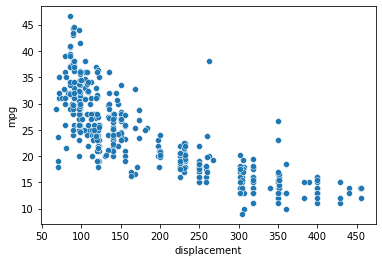

In [18]:
sns.scatterplot(x="displacement",y="mpg",data=dataset)

Also as the displacement of the car increases the miles per gallon (mpg) decreases

/Users/pranchalsihare/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cylinders', ylabel='Density'>

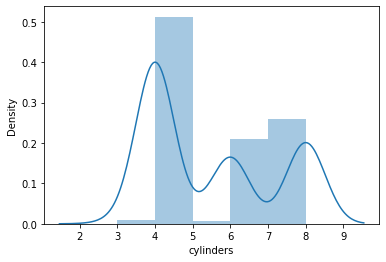

In [19]:
sns.distplot(dataset["cylinders"]) 

Most of cars in the dataset have 6 cylinders

<AxesSubplot:>

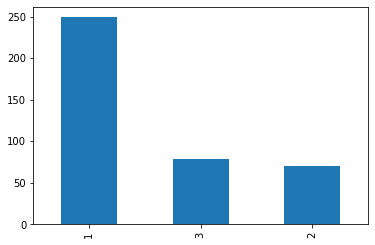

In [20]:
pd.value_counts(dataset["origin"]).plot.bar()

Most of cars in the dataset are originated from country assigned the value 1. So the model will predict more accurately for that country.

<AxesSubplot:>

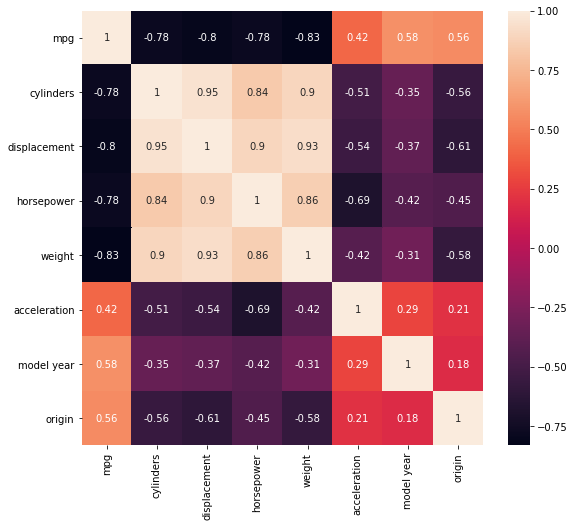

In [21]:
# checking correlation among independent variables
plt.figure(figsize = (9,8))
sns.heatmap(dataset.corr(),annot=True)

By looking at heatmap we can see that cylinders, displacement, horsepower and weight are negatively and strongly correlatrd to mpg.

The displacement, horsepower, weight,and cylinders have a strong positive correlations between themselves and this voilates the non-multicollinearity assumption of Linear regression. Multicollinearity interferes with the performance and accuracy of our regression model. To avoid this, we have to get rid of some of these variables by doing feature selection.

# Feature Selection

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [23]:
x = dataset.drop(["mpg","car name"],axis=1)
x = sm.add_constant(x)
x.sample(4)

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin
239,1.0,4,97.0,67,1985,16.4,77,3
303,1.0,4,85.0,65,2020,19.2,79,3
215,1.0,8,318.0,150,3755,14.0,76,1
289,1.0,8,350.0,155,4360,14.9,79,1


In [24]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns

In [25]:
vif_data["values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_data

,Variable,values
0,const,764.948909
1,cylinders,10.704347
2,displacement,21.941912
3,horsepower,9.697609
4,weight,10.680202
5,acceleration,2.568888
6,model year,1.250699
7,origin,1.749349


Here there is a problem of multicollinearity in our data since some of the variables have a vif greater than 10. And we can also saw that the displacement,horsepower,weight,and cylinders have a strong positive correlations between themselves and they are the cause of the multicollinearity as shown in the correlation heatmap above. To avoid this, we take out the feature having highest vif from our data and compute the variance inflation factors of the remaining variables and check if multicollinearity still exists.

In [26]:
x1 = dataset.drop(["mpg","car name","displacement"],axis=1)
x1 = sm.add_constant(x1)
x1.sample(4)

,const,cylinders,horsepower,weight,acceleration,model year,origin
7,1.0,8,215,4312,8.5,70,1
77,1.0,4,76,2511,18.0,72,2
80,1.0,4,86,2395,16.0,72,1
222,1.0,8,110,4060,19.0,77,1


In [27]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["values"] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif_data

,Variable,values
0,const,760.738609
1,cylinders,5.937022
2,horsepower,8.864865
3,weight,9.018682
4,acceleration,2.539199
5,model year,1.245532
6,origin,1.576197


Now, we have gotten rid of the multicollinearity as the remaining variables have a variance inflation factor less than 10.

In [28]:
dataset.drop(["displacement"],axis=1,inplace=True)
dataset.sample(4)

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
48,18.0,6,88,3139,14.5,71,1,ford
128,15.0,6,100,3336,17.0,74,1,chevrolet
174,18.0,6,97,2984,14.5,75,1,ford
131,32.0,4,65,1836,21.0,74,3,toyota


# Encoding Categorical Variable

As the car name (or so to say company name) column has more than 15 unique category values so we can not use OneHotEncoding even though it is nominal variable, so we will use Label Encoding.

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
dataset["car name"] = le.fit_transform(dataset["car name"])
dataset.head()

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,130,3504,12.0,70,1,7
1,15.0,8,165,3693,11.5,70,1,3
2,18.0,8,150,3436,11.0,70,1,25
3,16.0,8,150,3433,12.0,70,1,0
4,17.0,8,140,3449,10.5,70,1,13


# Seprating Independent and Dependent Variables

In [31]:
predictor = dataset.iloc[:,1:].values
predictor.shape

(398, 7)

In [32]:
target = dataset.iloc[:,0].values
target.shape

(398,)

# Min-Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms_predictor = ms.fit_transform(predictor)
ms_predictor

array([[1.        , 0.45652174, 0.5361497 , ..., 0.        , 0.        ,
        0.19444444],
       [1.        , 0.64673913, 0.58973632, ..., 0.        , 0.        ,
        0.08333333],
       [1.        , 0.56521739, 0.51686986, ..., 0.        , 0.        ,
        0.69444444],
       ...,
       [0.2       , 0.20652174, 0.19336547, ..., 1.        , 0.        ,
        0.30555556],
       [0.2       , 0.17934783, 0.2869294 , ..., 1.        , 0.        ,
        0.36111111],
       [0.2       , 0.19565217, 0.31386447, ..., 1.        , 0.        ,
        0.22222222]])

# Pricipal Component Analysis (PCA)

In [34]:
from sklearn.decomposition import PCA

In [35]:
ms_predictor.shape

(398, 7)

In [36]:
p = PCA()
p.fit(ms_predictor)

PCA()

In [37]:
reduced_predictor = p.transform(ms_predictor)
reduced_predictor

array([[ 0.74941655,  0.27083201, -0.23772838, ..., -0.02296859,
         0.20060865, -0.04163006],
       [ 0.85650728,  0.28654132, -0.23993729, ..., -0.08550077,
         0.08329525,  0.05057605],
       [ 0.67440421,  0.47295546,  0.03020007, ..., -0.12344762,
         0.18167829,  0.02795596],
       ...,
       [-0.15373242, -0.60107684,  0.0654013 , ..., -0.38135432,
         0.0228429 , -0.05657048],
       [-0.19883969, -0.64904271,  0.07377257, ...,  0.00820618,
        -0.09286963,  0.03553197],
       [-0.16009416, -0.69772956,  0.01091441, ...,  0.05536706,
        -0.12760591,  0.04928283]])

In [38]:
reduced_predictor.shape

(398, 7)

# Spliting the data into Train and Test

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(predictor,target,test_size=0.2,random_state=0)

In [41]:
x_train.shape

(318, 7)

In [42]:
x_test.shape

(80, 7)

In [43]:
y_train.shape

(318,)

In [44]:
y_test.shape

(80,)

# 1. Multi-Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred = mlr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)   # test data

0.8138705342820675

In [50]:
r2_score(y_train,mlr.predict(x_train))   # train data

0.8193799286827068

In [51]:
mlr.score(x_test,y_test)

0.8138705342820675

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

11.811287304612488

# 2. Decision Tree

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid={'max_leaf_nodes':np.arange(2,60),"criterion": ["mse", "friedman_mse", "mae", "poisson"],"random_state":[1]},scoring="r2",cv=5)
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [1]},
             scoring='r2')

In [56]:
dic = dt_grid.best_params_
dic

{'criterion': 'mse', 'max_leaf_nodes': 16, 'random_state': 1}

In [57]:
dt = dt_grid.best_estimator_
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=16, random_state=1)

In [58]:
y_pred = dt.predict(x_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8303052732275299

In [60]:
r2_score(y_train,dt.predict(x_train))

0.9005700950430328

In [ ]:
dfghjk

# 3. Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
RandomForestRegressor()

RandomForestRegressor()

In [66]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid={"n_estimators":np.arange(1,60),"criterion":["mse","mae"],"max_leaf_nodes":np.arange(2,80,2),"random_state":[1]},scoring="r2",cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [1]},
             scoring='r2')

In [72]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_leaf_nodes': 72,
 'n_estimators': 57,
 'random_state': 1}

In [73]:
rf = rf_grid.best_estimator_
rf.fit(x_train,y_train)

RandomForestRegressor(max_leaf_nodes=72, n_estimators=57, random_state=1)

In [74]:
y_pred = rf.predict(x_test)

In [75]:
r2_score(y_test,y_pred)  # test data

0.890062958980649

In [76]:
r2_score(y_train,rf.predict(x_train))  # train data

0.9738972677279044